In [127]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt

# Condiciones del Problema

In [128]:
L = 5 		# Longitud de la cuerda
lamdda = 1 	# Densidad de masa lineal de la cuerda
tau = 1		# Tensión de la cuerda
k = 200 	# Resolución espacio-temporal
nn = 80 	# Numero de terminos que se tomaran en la suma infinita


# Definir f(x) y g(x)
# Posición Inicial de la Cuerda
def f(x):
    resul = np.piecewise(x, [x < L/2, x > L/2], [lambda x: x, lambda x: -x+5])
    return resul

# Velocidad Inicial de la Cuerda
def g(x):
    resul = 0*x
    return resul

In [129]:
#######################################################################
# Definiendo los coeficientes de la serie
#######################################################################
from scipy.integrate import quad

def omega_r(r,L,tau,lamdda):
    return(r*np.pi/L)*np.sqrt(tau/lamdda)

# Función para calcular A_mn
def A_n(n):
    integrand = lambda x: (2/L)*f(x) * np.sin(n * np.pi * x/L)
    result, error = quad(integrand, 0, L)
    return result  # Factor de 4 por la fórmula

# Función para calcular B_mn
def B_n(n):
    omega_n = omega_r(n,L,tau,lamdda)
    
    integrand = lambda x: g(x) * np.sin(n* np.pi * x/L)
    result, error = quad(integrand, 0, L)
    return (-2/(omega_n * L)) *result 

########################################################################
# Colocando los coeficientes de la serie en listas
########################################################################

A = np.zeros([nn])
B = np.zeros([nn])

for i in range(nn):
    A[i] = A_n(i+1)
    B[i] = B_n(i+1)

#########################################################################
#	Generación de los valores de espacio y tiempo
#########################################################################

t_vals = np.linspace(0, 50, k)
x_vals = np.linspace(0, L, k)

#########################################################################
# Resolviendo el problema, se obtiene posición y velocidad
#########################################################################

# Las soluciones son matrices donde el primer indice indica el elemento de
# lista de tiempo (t_vals) y el segundo indice da la lista correspondiente
# de posiciones para dicho tiempo en el eje Y

# Inicializar q(t, x) como una matriz 2D: (len(t_vals), k)
q = np.zeros((len(t_vals), k))
dq = np.zeros((len(t_vals), k))

# Bucle sobre el tiempo y la suma  infinita truncada (n términos)
for t_idx, t in enumerate(t_vals):
    q_t = np.zeros((k))  # Matriz temporal para cada t
    dq_t = np.zeros((k)) 
    for i in range(nn):  # Suma sobre m
        # Parte temporal de la serie armónica
        q_temporal_part = A[i]*np.cos(omega_r(i+1,L,tau,lamdda)*t) - B[i]*np.sin(omega_r(i+1,L,tau,lamdda)*t)
        dq_temporal_part = -omega_r(i+1,L,tau,lamdda)*(A[i]*np.sin(omega_r(i+1,L,tau,lamdda)*t) + B[i]*np.cos(omega_r(i+1,L,tau,lamdda)*t))
        # Parte espacial de la serie armónica
        spatial_part = np.sin((i + 1) * np.pi * x_vals/L) 
        # Sumar contribución al valor de z en el tiempo t
        q_t += q_temporal_part * spatial_part
        dq_t += dq_temporal_part*spatial_part
    # Guardar los valores de z para el tiempo t en la matriz 3D
    q[t_idx] = q_t
    dq[t_idx] = dq_t

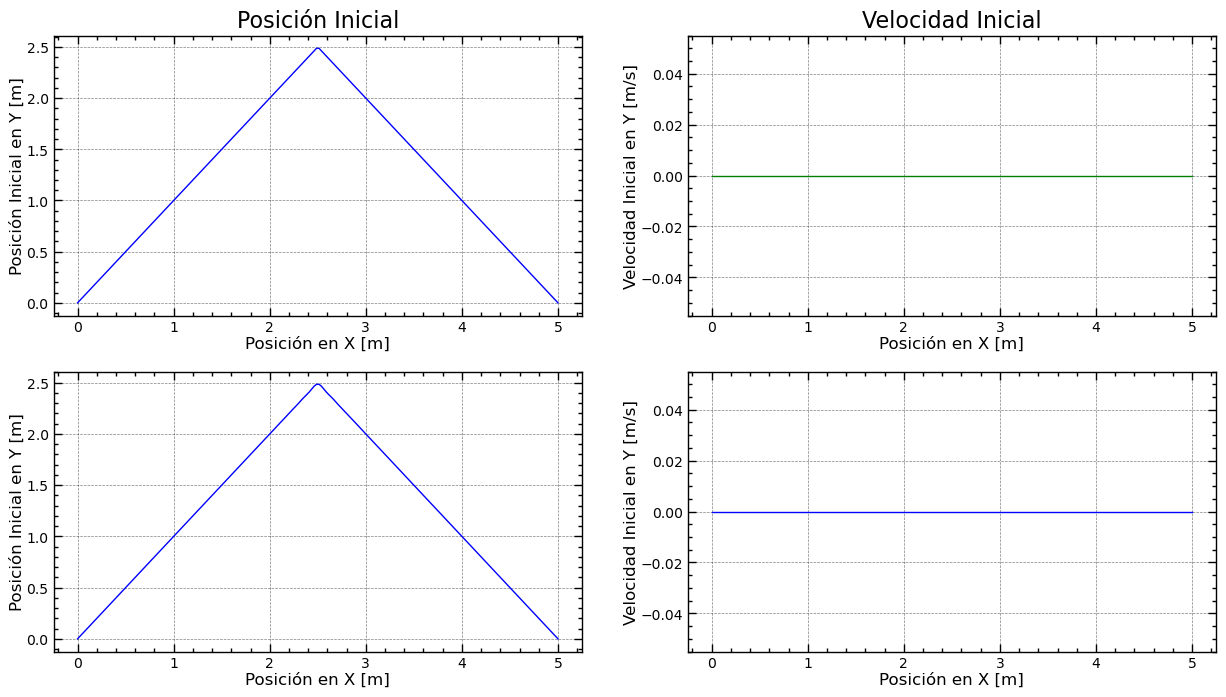

In [130]:
import scienceplots
plt.style.use(["science", "notebook" , "grid"])

fig, axes = plt.subplots(2,2, figsize = (15,8))
# los primeros argumentos del subplots() reflejan el numero de fijas y columnas de una "matriz" (por decirlo de alguna forma)
# donde cada entrada es una grafica individual



# PRIMERA GRAFICA
ax1 = axes[0][0] # Nos colocamos en la primera grafica, exactamente como si fuera una matriza de python
ax1.plot(x_vals, f(x_vals), "-", color= "blue", lw=1, ms = 3)
ax1.set_title("Posición Inicial")

ax1.tick_params(axis = "both", labelsize = 10) # Para cambiar el tamano de la numeracion de los ejes


# EJE X
ax1.set_xlabel("Posición en X [m]", labelpad = 1,fontsize = 12)


# EJE Y
ax1.set_ylabel("Posición Inicial en Y [m]",labelpad = 1, fontsize = 12)


# SEGUNDA GRAFICA
ax2 = axes[0][1]
ax2.plot(x_vals,g(x_vals), "-", color= "green", lw=1, ms = 3)
ax2.set_title("Velocidad Inicial")

ax2.tick_params(axis = "both", labelsize = 10)

# EJE X
ax2.set_xlabel("Posición en X [m]", labelpad = 1,fontsize = 12)


# EJE Y
ax2.set_ylabel(r"Velocidad Inicial en Y [m/s]", labelpad = 1,fontsize = 12)


# TERCERA GRAFICA

ax3 = axes[1][0]
ax3.plot(x_vals, q[0], "-", color= "blue", lw=1, ms = 3)


ax3.tick_params(axis = "both", labelsize = 10)


# EJE X
ax3.set_xlabel("Posición en X [m]", labelpad = 1,fontsize = 12)


# EJE Y
ax3.set_ylabel(r"Posición Inicial en Y [m]", labelpad = 1,fontsize = 12)


# CUARTA GRAFICA


ax4 = axes[1][1]
ax4.plot(x_vals, dq[0], "-", color= "blue", lw=1, ms = 3)


ax4.tick_params(axis = "both", labelsize = 10)


# EJE X
ax4.set_xlabel("Posición en X [m]", labelpad = 1,fontsize = 12)


# EJE Y
ax4.set_ylabel(r"Velocidad Inicial en Y [m/s]", labelpad = 1,fontsize = 12)


plt.style.use(["default"])

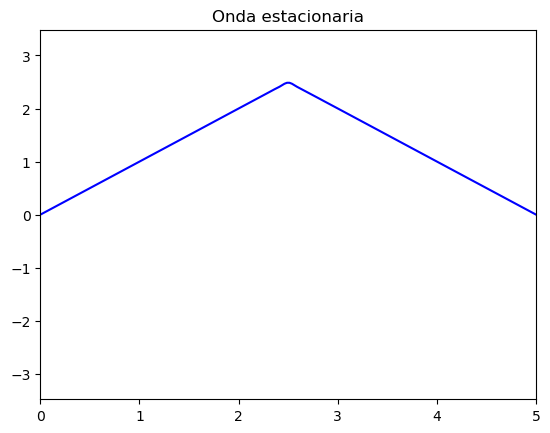

In [131]:
from matplotlib.animation import FuncAnimation


# Crear la figura y el eje
fig, ax = plt.subplots()
ax.set_title("Onda estacionaria")
ax.set_xlim(min(x_vals), max(x_vals))
ax.set_ylim(np.min(q)-1, np.max(q)+1)

# Crear la línea que se va a animar
line, = ax.plot([], [], 'b-')  # Línea en azul

# Función de inicialización
def init():
    line.set_data([], [])
    return line,

# Función de actualización para cada cuadro de la animación
def update(frame):
    y_data = q[frame]  # Selecciona los datos y para el tiempo correspondiente
    line.set_data(x_vals, y_data)
    return line,

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(t_vals), init_func=init, blit=True)
ani.save('animacion.mp4', writer='ffmpeg', fps=20)